<a href="https://colab.research.google.com/github/YuranShi/pytorch-deep-learning-notes/blob/main/1_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapeter 1 - PyTorch Workflow
Book version:  https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn # nn contain all PyTorch's building blocks for neural networks https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch Version
torch.__version__

'2.5.1+cu121'

## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

![image](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluate model (inference)",
                      5: "saving and loading model",
                      6: "putting it all together"}

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.
- Excel spreadsheet
- Image of any kind
- DNA/RNA
- Videos
- Audio like songs and podcasts
- Text
- ...

Machine Learning is a game of two parts:

1. Get data into **numerical representation**.
2. Build a model to **learn pattern** in numerical representations.

To showcase this, let create some *known* data from the linear regresson formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting Data into Training and Testing Sets

| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |


In [ ]:
# Create a 80/20 train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_lable = y_test,
                     predictions = None):
  """
  Plot training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_label, c = 'b', s=4, label="Training Data")

  # Plot training data in green
  plt.scatter(test_data, test_lable, c = 'g', s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14})

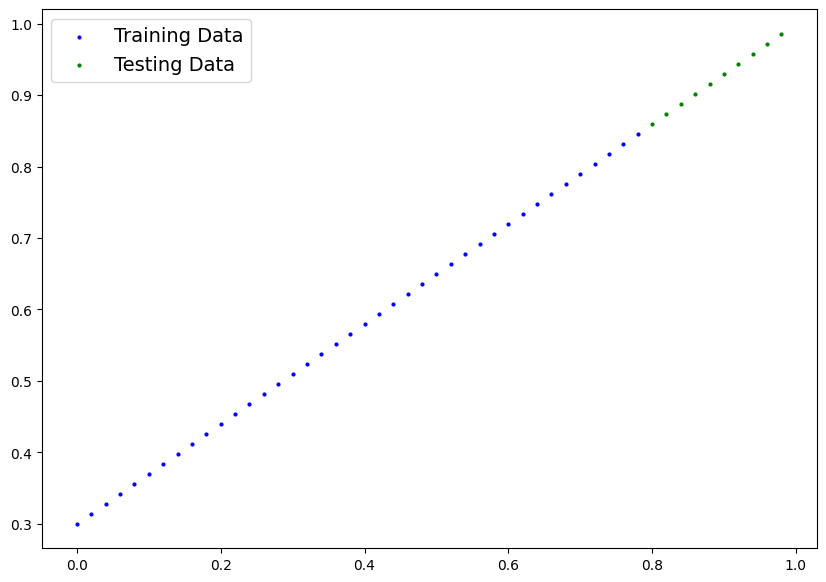

In [ ]:
plot_predictions()

## 2. Build Model

What our model does:

- Start w/ random values (weight & bias)
- Look at training data and adjust the random values to better represent the ideal values

How does it do so? Through 2 main algorithms:

1. Gradient decent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            requires_grad=True, # by default
                                            dtype=torch.float)) # <- PyTorch loves float32 by default
    self.bias = nn.Parameter(torch.rand(1, # <- start with random bias (this will get adjusted as the model learns)
                                        dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # linear regression formula


### PyTorch Model Building Essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

### Checking the Contents of Our PyTorch Model

- Check parameters using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters <- this is the random values that is initialized
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
# Check out model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [ ]:
# Check the ground truth parameters
weight, bias

(0.7, 0.3)

### Making Prediction using `torch.inference_mode()`

To see our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.



In [ ]:
 # Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You cal also do similar inference using torch.no_grad(), but inference_mode is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

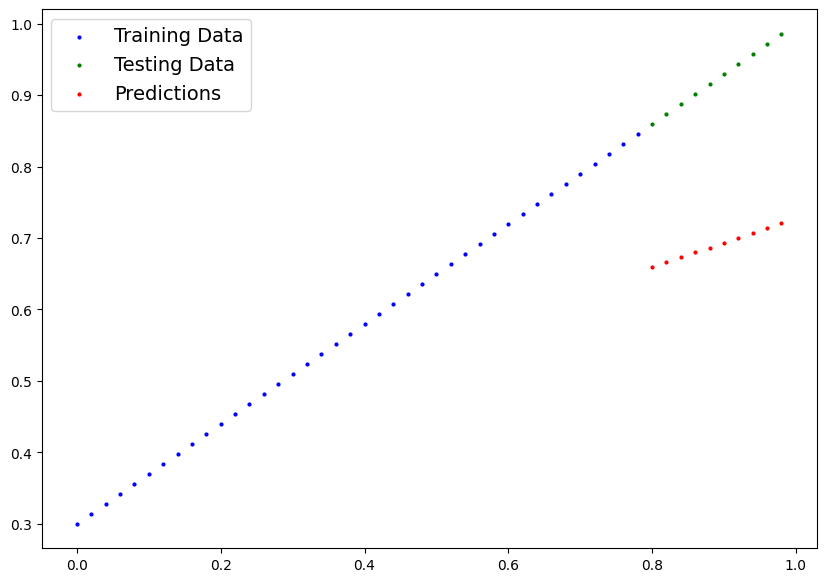

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

In other words, from a poor representation of the data to a better representation of data.

One way to measure how poor our predictions are is to use __loss function__.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to ideal output, lower is better.

  * Loss function documentation: https://pytorch.org/docs/stable/nn.html#loss-functions


* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weights & bias) to improve the loss function.
  * Inside the optimizer you'll often set 2 parameters:
    * `params` - the model parameters that you would like to optimize
    * `lr` - learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step. A small `lr` results in a small change, and a large `lr` results in a large change.

  * Optimizer documentation: https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rates (possibly the most important hypetparameter)

### Building a Training Loop (and a Testing Loop) in PyTorch

For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.

In [ ]:
# An epoch is one loop through the data (this is an hyperparameter b/c we set it ourselves)
epoch = 200

# Track experiment
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epoch):
  # Set the model to training mode
  model_0.train()

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad -- optimizers change will accumulate, so we need to zero the optimizer
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters
  loss.backward()

  # 5. Step the optimizer (Perfrom gradient decent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/BatchNorm)
  with torch.inference_mode(): # turns off gradient tracking & more things behind
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss (above is the training loss, this is the testing loss)
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happining
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      # Print out model parameters
      print(model_0.state_dict())



Epoch: 0 | Loss: 0.08169572055339813 | Test loss: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | Loss: 0.06808149069547653 | Test loss: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | Loss: 0.06258393079042435 | Test loss: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | Loss: 0.05879194289445877 | Test loss: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | Loss: 0.05530194193124771 | Test loss: 0.13084018230438232
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | Loss: 0.051822252571582794 | Test loss: 0.12050700187683105
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | Loss: 0.04838593676686287 | Test loss: 0.11223447322845459
OrderedDict([('weights', tensor([0.4610])), ('bias', tensor([0.4004

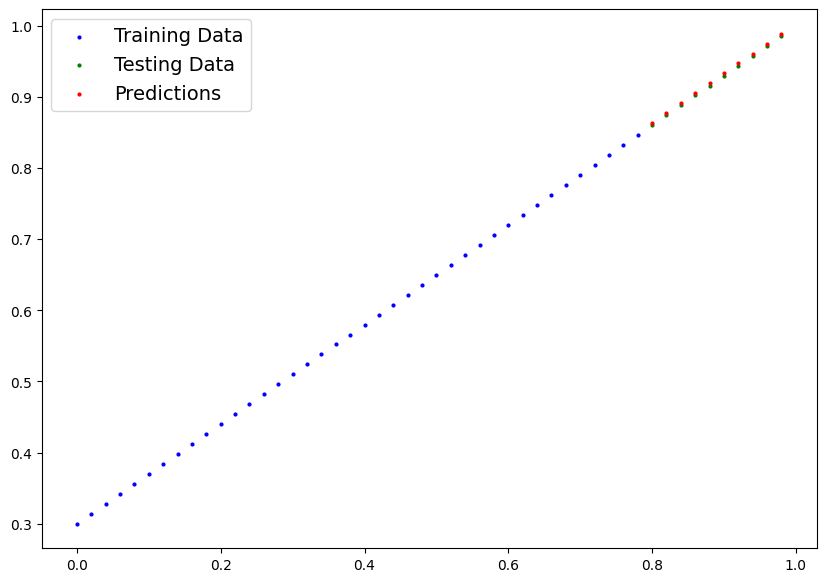

In [ ]:
# Let's make inference and see the model performance
with torch.inference_mode():
  y_preds_new = model_0(X_test)

# Visualize
plot_predictions(predictions=y_preds_new) # our prediction get better!!

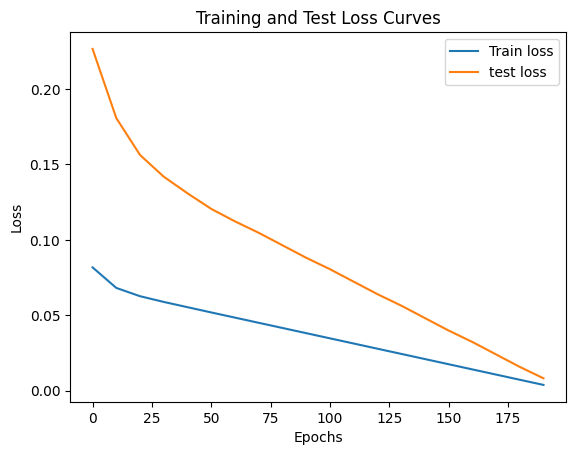

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="test loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

## 4. Saving and Loading a Model in PyTorch

There are 3 main methods for saving and loading models:
1. `torch.save()` - allow you to save a PyTorch object in Python's picke format
2. `torch.load()` - allow you to load a saved PyTorch object
3.`torch.nn.Module.load_state_dict()` - load a model's saved dictionary

PyTorch Documentation: https://pytorch.org/tutorials/beginner/saving_loading_models.html

__Loading:__ Since we saved the model's state_dict(), we need to create a new instance of our model class and load state_dict() into that.

In [ ]:
# Saving our PyTorch Model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "linear_regression_model_0.pth" # .pth/.pt is a convention for saving PyTorch model
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/linear_regression_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Dec 18 20:12 linear_regression_model_0.pth


In [ ]:
# Loading a PyTorch model
loaded_model_0 = LinearRegressionModel() # new instance of model

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-98-1d2f340a8d7c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
# Let's check the parameter values
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [ ]:
# Make some prediction with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_pred = loaded_model_0(X_test)

# Compare loaded model predictions with original predictions
loaded_pred == y_preds_new # YAY!!

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting Everything Together

In [ ]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


#### 6.1 *Data*

In [ ]:
# Create some data using linear regression formula
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#### 6.2 Building a Pytorch Linear Model

In [ ]:
# Create model by subclass nn.Module
# Compare with previous implementation and see how we do this differently!

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    ## Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1, # take input of size 1
                                  out_features=1) # take output of size 1

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model's current device
print(next(model_1.parameters()).device)

# Set model to target device
model_1.to(device)
print(next(model_1.parameters()).device)

# Set data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

cuda:0
cuda:0


#### 6.3 Training

For training we need
- Loss function
- Optimizer
- Training loop
- Testing loop

In [ ]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

#### 6.4 Making Prediction using Trained Model

In [ ]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

#### 6.5 Saving and Loading Model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load a Model
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Loaded model to device
loaded_model_1.to(device)

<ipython-input-46-ce1cc5a6980a>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()

with torch.inference_mode():
  y_loaded_pred = loaded_model_1(X_test)

y_loaded_pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')